In [ ]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import networkx as nx
import pylab as plt

eventsItaly = pd.read_json('/content/drive/My Drive/bachelor data/events/events_Italy.json')
matchesItaly = pd.read_json("/content/drive/My Drive/bachelor data/matches/matches_Italy.json")
tagsName = pd.read_csv("/content/drive/My Drive/bachelor data/tags2name.csv")
with open('/content/drive/My Drive/bachelor data/events/events_Italy.json') as f:
    d = json.load(f)
tags = json_normalize(data=d, record_path='tags', meta=['id'], record_prefix='_')
teams = pd.read_json("/content/drive/My Drive/bachelor data/teams.json")
eventsItalyTags = pd.merge(eventsItaly,
                       tags,
                       on='id')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


In [ ]:
def checkZones2(dataframe, columnName):
  resultSeries = pd.Series([])
  i = -1
  for index, row in dataframe.iterrows():
    x = (row[columnName])['x']
    y = (row[columnName])['y']
    index = i + 1
    resultSeries = resultSeries.append(pd.Series([int(((x // 20) * 3) + 1 + (y // 33.3))]), ignore_index=True)
  return resultSeries

In [ ]:
# Filling 2D matrix of Barcelona team with corresponding passes
def get2dMatrix(passesDataframe, senderColumnName, RecipientColumnName):
  arr = np.arange(225).reshape(15,15)
  i = 0
  j = 0
  passCount = 0
  for i in range(15):
    for j in range(15):
      passCount = 0
      for index, row in passesDataframe.iterrows():
        if(row[senderColumnName] == i+1 and  row[RecipientColumnName] == j+1):
          passCount += 1
        arr[i][j] = passCount    
      j += 1
    i += 1 
  return arr

In [ ]:
def getTeamMatrix(teamId, teamMatchId):
  
  # Getting Successful passes of specific team in specific match
  successfulPasses = eventsItalyTags[(eventsItalyTags['teamId'] == teamId) & (eventsItalyTags['matchId'] == teamMatchId) & (eventsItalyTags['eventId'] == 8) & (eventsItalyTags['_id'] == 1801)]
  successfulPasses.reset_index(level=0, inplace=True)

  # Adding Sender/Recipient positions
  successfulPasses2 = successfulPasses['positions'].sum()
  del successfulPasses2[1::2]
  x2 = pd.Series(successfulPasses2)
  successfulPassesSender = pd.concat([successfulPasses, pd.DataFrame(x2)], axis=1)
  successfulPassesSender.rename(columns = {0:'Sender'}, inplace = True)

  successfulPasses1 = successfulPassesSender['positions'].sum()
  del successfulPasses1[0::2]
  x = pd.Series(successfulPasses1)
  successfulPassesSenderRecipient = pd.concat([successfulPassesSender, pd.DataFrame(x)], axis=1)
  successfulPassesSenderRecipient.rename(columns = {0:'Recepient'}, inplace = True) 

  # Adding Sender/Recipient zones

  zoneSeriesSender = checkZones2(successfulPassesSenderRecipient, 'Sender')
  zoneDataframeSender = pd.DataFrame(zoneSeriesSender)
  zoneDataframeSender.rename(columns = {0:'SenderZone'}, inplace = True)

  zoneSeriesRecipient = checkZones2(successfulPassesSenderRecipient, 'Recepient')
  zoneDataframeRecipient = pd.DataFrame(zoneSeriesRecipient)
  zoneDataframeRecipient.rename(columns = {0:'RecipientZone'}, inplace = True)

  successfulPassesSenderRecipientZ = pd.concat([successfulPassesSenderRecipient, zoneDataframeSender], axis=1)
  successfulPassesSenderRecipientZone = pd.concat([successfulPassesSenderRecipientZ, zoneDataframeRecipient], axis=1)
  
  # returning the 2D passes Matrix
  return get2dMatrix(successfulPassesSenderRecipientZone, 'SenderZone', 'RecipientZone').flatten()

In [ ]:
def getTeamMatches(teamId):
  teamMatchesIds = np.array([])
  eventsItalyTeam = eventsItaly[eventsItaly['teamId'] == teamId]
  teamMatchesIds = eventsItalyTeam.matchId.unique()
  return teamMatchesIds

In [ ]:
def getTeamMatrices(teamId):
  teamMatches = getTeamMatches(teamId)
  teamMatrices = np.zeros((len(teamMatches), 225))
  for i in range(len(teamMatches)):
    teamMatrices[i] = getTeamMatrix(teamId, teamMatches[i])
  return teamMatrices

In [ ]:
juventusMatrices = np.zeros((38, 225))
napoliMatrices = np.zeros((38, 225))
hellasMatrices = np.zeros((38, 225))
beneventoMatrices = np.zeros((38, 225))

juventusMatrices = getTeamMatrices(3159)
napoliMatrices = getTeamMatrices(3187)
hellasMatrices = getTeamMatrices(3194)
beneventoMatrices = getTeamMatrices(3219)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
eventsItaly[eventsItaly['eventName'] == 'Pass'].head(49)

In [ ]:
romaMatrices = np.zeros((38, 225))
romaMatrices = getTeamMatrices(3158)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
romaMatrices

array([[ 5.,  2.,  2., ...,  1.,  7.,  7.],
       [ 4.,  5.,  2., ...,  1.,  5.,  3.],
       [ 1.,  4.,  1., ...,  4.,  2.,  6.],
       ...,
       [ 8.,  5.,  1., ...,  2.,  4., 10.],
       [ 2.,  6.,  2., ...,  1.,  1.,  9.],
       [ 4.,  8.,  2., ...,  0.,  2., 14.]])

In [ ]:
internazionaleMatrices = np.zeros((38, 225))
internazionaleMatrices = getTeamMatrices(3161)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
internazionaleMatrices

array([[ 3.,  1.,  0., ...,  2.,  3.,  6.],
       [ 4.,  4.,  0., ...,  1.,  8.,  7.],
       [ 4.,  2.,  1., ...,  4., 10., 45.],
       ...,
       [ 3.,  5.,  0., ...,  2.,  6., 26.],
       [ 2.,  2.,  6., ...,  2.,  9., 10.],
       [ 2.,  1.,  1., ...,  1.,  0.,  2.]])

In [ ]:
lazioMatrices = np.zeros((38, 225))
lazioMatrices = getTeamMatrices(3162)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
lazioMatrices

array([[ 0.,  1.,  1., ...,  2.,  3.,  3.],
       [ 2.,  4.,  4., ...,  3., 10.,  4.],
       [ 9.,  5.,  0., ...,  0.,  2.,  2.],
       ...,
       [ 1.,  3.,  7., ...,  3.,  3.,  6.],
       [ 2.,  5.,  1., ...,  3.,  6.,  7.],
       [ 4.,  2.,  1., ...,  1.,  2.,  2.]])

In [ ]:
milanMatrices = np.zeros((38, 225))
milanMatrices = getTeamMatrices(3157)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
milanMatrices

array([[ 0.,  4.,  3., ...,  3.,  5.,  6.],
       [ 2.,  2.,  1., ...,  3.,  5., 10.],
       [ 2.,  2.,  1., ...,  1.,  5., 19.],
       ...,
       [ 8.,  8.,  0., ...,  2., 16., 16.],
       [ 4.,  2.,  3., ...,  4.,  4., 14.],
       [ 4.,  4.,  1., ...,  3.,  7., 25.]])

In [ ]:
atalantaMatrices = np.zeros((38, 225))
atalantaMatrices = getTeamMatrices(3172)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
atalantaMatrices

array([[ 4.,  3.,  0., ...,  3.,  4.,  9.],
       [ 0.,  6.,  2., ...,  0.,  2.,  6.],
       [ 3.,  1.,  0., ...,  0.,  4., 14.],
       ...,
       [12.,  6.,  2., ...,  2.,  7.,  8.],
       [ 2.,  3.,  3., ...,  3.,  4., 12.],
       [ 8.,  8.,  3., ...,  0.,  7., 25.]])

In [ ]:
fiorentinaMatrices = np.zeros((38, 225))
fiorentinaMatrices = getTeamMatrices(3176)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
fiorentinaMatrices

array([[ 2.,  4.,  3., ...,  1., 16., 15.],
       [ 9.,  8.,  1., ...,  1.,  7.,  8.],
       [ 1.,  4.,  2., ...,  1.,  2.,  5.],
       ...,
       [ 0.,  1.,  0., ...,  2.,  8.,  9.],
       [ 3.,  2.,  3., ...,  1.,  8., 17.],
       [ 6.,  5.,  3., ...,  0.,  2.,  3.]])

In [ ]:
torinoMatrices = np.zeros((38, 225))
torinoMatrices = getTeamMatrices(3185)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
torinoMatrices

array([[ 1.,  1.,  3., ...,  0.,  6.,  6.],
       [ 2.,  0.,  2., ...,  0.,  3.,  6.],
       [ 1.,  2.,  3., ...,  4.,  2.,  6.],
       ...,
       [ 1.,  4.,  3., ...,  0.,  1.,  8.],
       [ 9.,  5.,  2., ...,  2.,  7., 16.],
       [19.,  5.,  3., ...,  1.,  3.,  9.]])

In [ ]:
sampadoriaMatrices = np.zeros((38, 225))
sampadoriaMatrices = getTeamMatrices(3164)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
sampadoriaMatrices

array([[ 5.,  4.,  5., ...,  0.,  6., 15.],
       [ 3.,  4.,  1., ...,  1.,  3.,  8.],
       [ 5.,  4.,  0., ...,  1.,  6., 11.],
       ...,
       [ 7.,  8.,  1., ...,  1.,  5.,  8.],
       [ 9.,  4.,  1., ...,  1.,  0.,  5.],
       [ 2.,  4.,  1., ...,  2.,  3., 13.]])

In [ ]:
sassoloMatrices = np.zeros((38, 225))
sassoloMatrices = getTeamMatrices(3315)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
sassoloMatrices

array([[1., 0., 3., ..., 0., 5., 1.],
       [5., 0., 1., ..., 1., 4., 4.],
       [5., 3., 5., ..., 4., 1., 5.],
       ...,
       [2., 2., 0., ..., 1., 4., 1.],
       [4., 2., 1., ..., 0., 2., 4.],
       [2., 4., 2., ..., 2., 9., 6.]])

In [ ]:
genoaMatrices = np.zeros((38, 225))
genoaMatrices = getTeamMatrices(3193)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
genoaMatrices

array([[1., 1., 0., ..., 0., 5., 2.],
       [1., 0., 0., ..., 0., 3., 1.],
       [2., 2., 0., ..., 0., 2., 5.],
       ...,
       [1., 1., 0., ..., 0., 4., 2.],
       [1., 1., 0., ..., 0., 2., 2.],
       [0., 1., 0., ..., 1., 2., 5.]])

In [ ]:
chievoMatrices = np.zeros((38, 225))
chievoMatrices = getTeamMatrices(3165)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
chievoMatrices

NameError: ignored

In [ ]:
udineseMatrices = np.zeros((38, 225))
udineseMatrices = getTeamMatrices(3163)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
udineseMatrices

array([[ 3.,  2.,  0., ...,  5.,  5.,  7.],
       [ 2.,  1.,  2., ...,  2.,  3., 11.],
       [ 1.,  1.,  3., ...,  3.,  2.,  2.],
       ...,
       [ 2.,  4.,  1., ...,  2.,  5., 11.],
       [ 0.,  0.,  0., ...,  4.,  2.,  3.],
       [ 2.,  3.,  0., ...,  0.,  0.,  3.]])

In [ ]:
bologonaMatrices = np.zeros((38, 225))
bologonaMatrices = getTeamMatrices(3166)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
bologonaMatrices

array([[ 4.,  3.,  1., ...,  1.,  6.,  8.],
       [ 0.,  1.,  2., ...,  2.,  2.,  3.],
       [ 3.,  5.,  1., ...,  0.,  0.,  2.],
       ...,
       [ 1.,  0.,  3., ...,  0.,  2.,  5.],
       [ 5.,  6.,  0., ...,  1.,  4., 13.],
       [ 4.,  2.,  1., ...,  1.,  3., 10.]])

In [ ]:
cagliariMatrices = np.zeros((38, 225))
cagliariMatrices = getTeamMatrices(3173)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
cagliariMatrices

array([[ 1.,  2.,  0., ...,  0.,  1.,  4.],
       [ 9.,  3.,  3., ...,  3.,  4.,  2.],
       [ 4.,  3.,  3., ...,  0.,  1.,  0.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  3., 17.],
       [ 2.,  1.,  0., ...,  1.,  6.,  7.],
       [ 0.,  1.,  0., ...,  2.,  4.,  2.]])

In [ ]:
spalMatrices = np.zeros((38, 225))
spalMatrices = getTeamMatrices(3204)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
spalMatrices

array([[ 6.,  4.,  3., ...,  3.,  3.,  3.],
       [ 5.,  4.,  0., ...,  1.,  4.,  8.],
       [ 4.,  1.,  2., ...,  3.,  8.,  6.],
       ...,
       [ 1.,  1.,  0., ...,  0.,  3.,  7.],
       [ 2.,  3.,  1., ...,  0.,  0., 11.],
       [ 2.,  4.,  1., ...,  1.,  4.,  8.]])

In [ ]:
crotoneMatrices = np.zeros((38, 225))
crotoneMatrices = getTeamMatrices(3197)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
crotoneMatrices

array([[3., 2., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 3.],
       [4., 3., 1., ..., 0., 3., 2.],
       ...,
       [1., 2., 0., ..., 2., 2., 4.],
       [3., 2., 0., ..., 0., 2., 0.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [ ]:
mixMatrices = np.concatenate((juventusMatrices, napoliMatrices, hellasMatrices, beneventoMatrices))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [ ]:
#MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.MinMaxScaler()
pca5 = PCA(n_components = 2)
mixMatrices_scaled = min_max_scaler.fit_transform(mixMatrices)
principalComponents = pca5.fit_transform(mixMatrices_scaled)
principalDf5 = pd.DataFrame(data = principalComponents, columns= ['0', '1'])
principalDf5.head()

,0,1
0,0.817842,1.003037
1,0.765015,1.104566
2,-0.032641,0.761454
3,0.652891,0.355143
4,0.636828,0.274675


In [ ]:
cols=[]
for i in range(152):
  if i<38:
    cols.append('red')
  else:
    if (i<76):  
      cols.append('black')
    else:
      if (i<114):
        cols.append('yellow')
      else:
        cols.append('blue')  

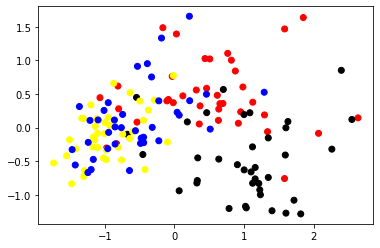

In [ ]:
#MinMaxScaler
plt.scatter(principalDf5['0'], principalDf5['1'], c=cols)

In [ ]:
#MinMaxScaler
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(principalDf5[['0', '1']])
model.cluster_centers_

array([[-0.75686606,  0.04578615],
       [ 1.06922348, -0.06468203]])

In [ ]:
#MinMaxScaler
centroids = pd.DataFrame(model.cluster_centers_, columns=["0", "1"])
principalDf5['predicted'] = model.labels_
principalDf5.head(5)

,0,1,predicted
0,0.817842,1.003037,1
1,0.765015,1.104566,1
2,-0.032641,0.761454,0
3,0.652891,0.355143,1
4,0.636828,0.274675,1


In [ ]:
juveCluster1 = 0
juveCluster2 = 0
napoliCluster1 = 0 
napoliCluster2 = 0
hellasCluster1 = 0
hellasCluster2 = 0
benventoCluster1 = 0
benventoCluster2 = 0

for index, row in principalDf5.iterrows():
  if(index < 38):
    if(row['predicted'] == 0):
      juveCluster1 += 1
    else:
      juveCluster2 += 1
  else:
    if(index < 76):
      if(row['predicted'] == 0):
        napoliCluster1 += 1
      else:
        napoliCluster2 += 1
    else:
      if(index < 114):
        if(row['predicted'] == 0):
          hellasCluster1 += 1
        else:
          hellasCluster2 += 1  
      else:
        if(row['predicted'] == 0):
          benventoCluster1 += 1
        else:
          benventoCluster2 += 1  

print(juveCluster1)
print(juveCluster2)
print(napoliCluster1)
print(napoliCluster2)
print(hellasCluster1)
print(hellasCluster2)
print(benventoCluster1)
print(benventoCluster2)

13
25
4
34
38
0
34
4


<Figure size 504x504 with 0 Axes>

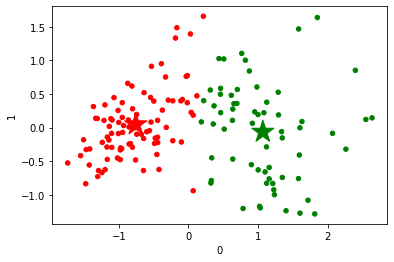

In [ ]:
#MinMaxScaler
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
## Plot scatter by cluster / color, and centroids
colors = ["red", "green"]
principalDf5['color'] = principalDf5['predicted'].map(lambda p: colors[p])
ax = principalDf5.plot(    
    kind="scatter", 
    x="0", y="1",
    c = principalDf5['color']
)
centroids.plot(
    kind="scatter", 
    x="0", y="1", 
    marker="*", c=["r", "g"], s=550,
    ax=ax
)

In [ ]:
from google.colab import files
import pickle
with open('serieA.pickle', 'wb') as f:
  pickle.dump([juventusMatrices, napoliMatrices, romaMatrices, internazionaleMatrices, lazioMatrices, milanMatrices, atalantaMatrices, fiorentinaMatrices, torinoMatrices, sampadoriaMatrices, sassoloMatrices, genoaMatrices, chievoMatrices, udineseMatrices, bologonaMatrices, cagliariMatrices, spalMatrices, crotoneMatrices, hellasMatrices, beneventoMatrices], f)
files.download('serieA.pickle')   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>